In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## from literature

In [3]:
# initialization
Z_A = 0.555087;
density = 1.0; #g/cm3
T0 = 0.514; #MeV
T1 = 322.2; # MeV
m0 = 0.511; #MeV
b0 = 17.6533; b1 = 20.1550; b2 = 3.2725; b3 = 12.8961; k = 3.4773


In [17]:
def B0_electron(T):  # input: kinetic energye
    T = T / m0
    return np.log(T**2*(T+2)/2)+(1+T**2/8-(2*T+1)*np.log(2))/(T+1)**2

def B0_positron(T):
    beta = np.sqrt(1-(m0/(m0+T))**2)
    T = T / m0
    return np.log(T**2*(T+2)/2)+2*np.log(2)-(beta**2/12)*(23+14*(T+2)+10/(T+2)**2+4/(T+2)**3)

In [10]:
def B_electron(T):
    p = np.sqrt((T+m0)**2 - m0**2)
    if T<=T0:
        return B0_electron(T) + b0 - 0*(p/m0)**2
    if (T>T0 and T<T1):
        B1 = B0_electron(T) + 1 - 2*np.log(p/m0)
        return B1 + b1-b2*(1-(2*np.log(p/m0))/b3)**k
    if (T>=T1):
        return B1 + b1

In [11]:
def B_positron(T):
    p = np.sqrt((T+m0)**2 - m0**2)
    if T<=T0:
        return B0_positron(T) + b0 - 0*(p/m0)**2
    if (T>T0 and T<T1):
        B1 = B0_positron(T) + 1 - 2*np.log(p/m0)
        return B1 + b1-b2*(1-(2*np.log(p/m0))/b3)**k
    if (T>=T1):
        return B1 + b1

In [7]:
def dEdx_electron(T):
    beta = np.sqrt(1-(m0/(m0+T))**2)    
    return density * 0.153536 / beta**2 * Z_A *B_electron(T)

def dEdx_positron(T):
    beta = np.sqrt(1-(m0/(m0+T))**2)    
    return density * 0.153536 / beta**2 * Z_A *B_positron(T)

In [18]:
### calculate for electron in water:
Ek = np.arange(0.1, 8., 0.1)
dEdx1 = []; dEdx2 = [];
for i in Ek:
    dEdx1.append(dEdx_electron(i));
    dEdx2.append(dEdx_positron(i));

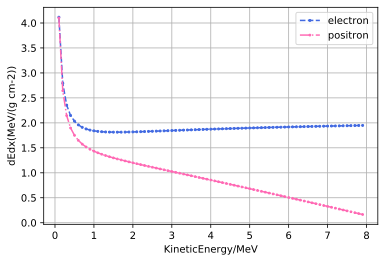

In [25]:
plt.plot(Ek, dEdx1, 'o--', ms=2, label='electron', color='royalblue')
plt.plot(Ek, dEdx2, 'p-.', ms=2, label='positron', color='hotpink')
plt.legend()
plt.xlabel('KineticEnergy/MeV')
plt.ylabel("dEdx(MeV/(g cm-2))")
plt.grid(True)

## from Geant4 and estar

In [29]:
LS_density = 0.8346 # g/cm3
kB1 = 6.5e-3 #g/cm2/MeV

In [44]:
dEdx = []; T = [];
with open("./dEdx.txt") as f:
    for lines in f.readlines():
        line = lines.strip("\n")
        data = lines.split(" ")
        dEdx.append(float(data[0])*float(data[1])/kB1)  # MeV*cm2/g
        T.append(float(data[2]))
dEdx = np.array(dEdx); T = np.array(T)

with open("StopPow2.txt", "w") as f:
    for i in range(len(dEdx)):
        f.write(str(T[i]) + " " + str(dEdx[i])+ "\n")

In [70]:
dEdx = []; T = [];
with open("./StopPow2.txt") as f:
    for lines in f.readlines():
        line = lines.strip("\n")
        data = lines.split(" ")
        dEdx.append(float(data[1]))  # MeV*cm2/g
        T.append(float(data[0]))
dEdx = np.array(dEdx); T = np.array(T)

In [72]:
dEdx_estar = []; E_estar= [];
with open("./StopPow3.txt") as f:
    for lines in f.readlines():
        line = lines.strip("\n")
        data = lines.split(" ")
        dEdx_estar.append(float(data[1]))
        E_estar.append(float(data[0]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


Text(0.012, 200, 'No estar data below 10keV')

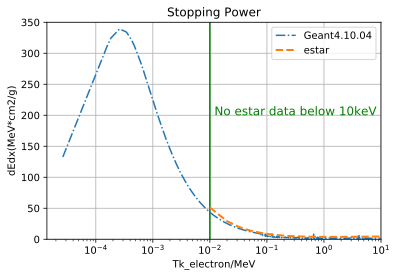

In [73]:
plt.plot(T, dEdx, '-.',ms=2, label="Geant4.10.04")
plt.plot(E_estar, dEdx_estar, '--', ms=2, label="estar", lw=2)
plt.xlabel("Tk_electron/MeV"); plt.ylabel("dEdx(MeV*cm2/g)");plt.grid("True")
plt.legend(); plt.title("Stopping Power")
plt.semilogx()
plt.xlim(0,10); plt.ylim(0,350)
plt.vlines(0.01, 0, 350, color='green')
plt.text(0.012, 200, "No estar data below 10keV", color="green", fontsize =12)

In [63]:
plt.vlines?